# KMeans Clustering 

## 1. Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Dataset

In [13]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


-> Only Age , Annual Income and Spending Score are important to find the sales

## 3. Data Preprocessing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
# Checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values

In [16]:
# Droping the columns which are not required for the analysis
df.drop(columns={"CustomerID","Gender"} , inplace=True)

Customer ID and Gender are unrelavent so they are droped

In [18]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## 4. EDA

We use Scatter Plot to visualize and analyze the relationship, correlation, or trend between two numerical (quantitative) variables , outlier , pattern

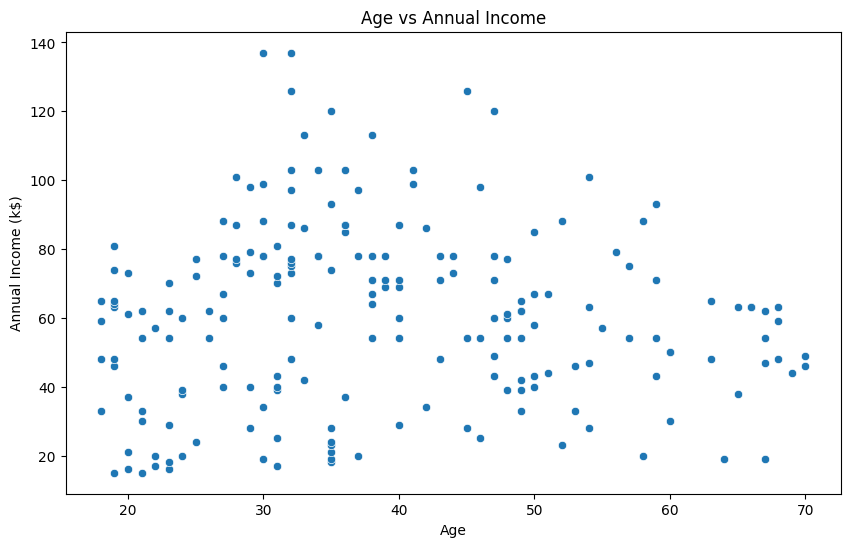

In [20]:
# Display age and annual income scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

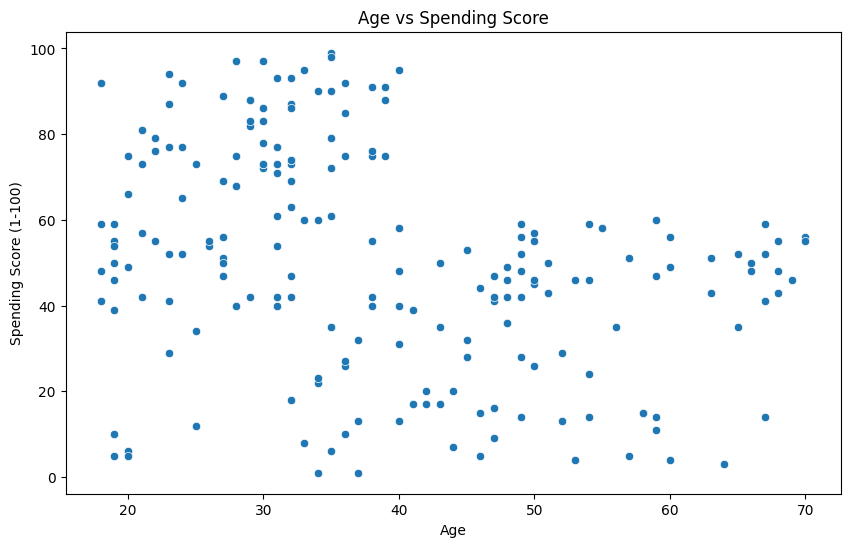

In [21]:
# Display Age and Spending Score scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 5. Feature Engineering

In [24]:
# Finding the Skewness of the data and check wether the data is skew or not and which type of skewness is present
df.skew()
    
print("Skewness of Age:", df['Age'].skew())
print("Skewness of Annual Income:", df['Annual Income (k$)'].skew())
print("Skewness of Spending Score:",df['Spending Score (1-100)'].skew())

Skewness of Age: 0.48556885096681657
Skewness of Annual Income: 0.3218425498619055
Skewness of Spending Score: -0.047220201374263374


In [25]:
# Display skewness name normal , right skewed , left skewed

def skewness_name(skewness):
    if skewness > 0:
        return "Right Skewed"
    elif skewness < 0:
        return "Left Skewed"
    else:
        return "Normal"
    
print("Skewness of Age:", skewness_name(df['Age'].skew()))
print("Skewness of Annual Income:", skewness_name(df['Annual Income (k$)'].skew()))
print("Skewness of Spending Score:", skewness_name(df['Spending Score (1-100)'].skew()))

Skewness of Age: Right Skewed
Skewness of Annual Income: Right Skewed
Skewness of Spending Score: Left Skewed


In [26]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## 6. Train K-Mean model

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_
df.head()

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

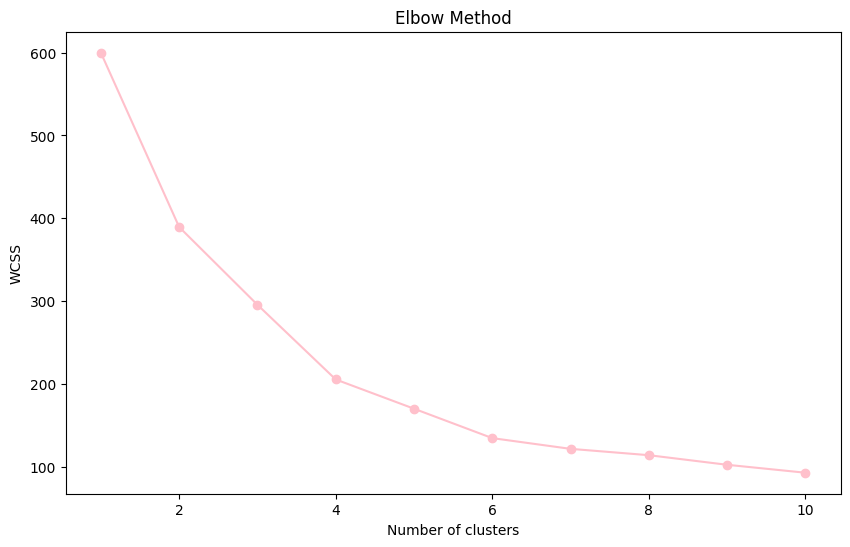

In [29]:
# Check with ElBow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop("Cluster", axis=1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o',color='pink')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

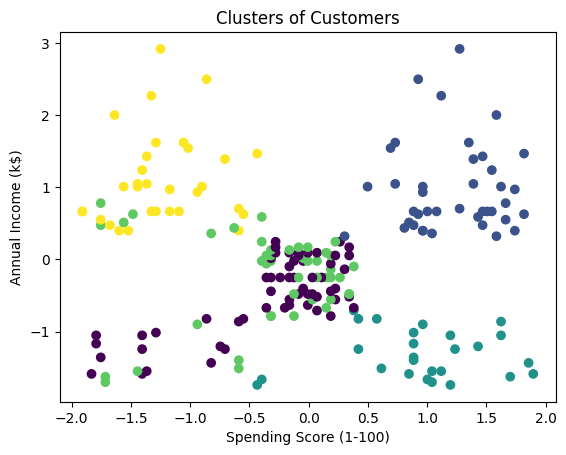

In [30]:
# Display the clusters using scatter plot

plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"], c=df["Cluster"])
plt.title('Clusters of Customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [33]:
# Saving the clustered data to a new CSV file
df.to_csv('Kmeans_Clustering.csv', index=False)

# Classification on New Dataset - Kmeans_Clustering.csv

In [34]:
# Loding the clustered data from the CSV file
clustered_df = pd.read_csv('Kmeans_Clustering.csv')
clustered_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [36]:
# Splitting the data into features and target variable
X = clustered_df.drop("Cluster", axis=1)
y = clustered_df["Cluster"]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [37]:
y

0      2
1      2
2      3
3      2
4      2
      ..
195    1
196    4
197    1
198    4
199    1
Name: Cluster, Length: 200, dtype: int64

In [38]:
# Train-test-split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# using Decision Tree Classifier model

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=45)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=45)

In [45]:
# Predicting the clusters for the test set

y_pred = dtc.predict(X_test)
y_pred

array([3, 2, 0, 4, 4, 3, 3, 4, 4, 2, 0, 4, 1, 3, 4, 1, 0, 4, 0, 2, 3, 3,
       4, 3, 2, 0, 3, 0, 1, 3, 2, 0, 0, 3, 4, 0, 1, 1, 4, 0])

In [46]:
# Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

con_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", con_mat)

class_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", class_rep)


Accuracy: 0.95
Confusion Matrix:
 [[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  2 10  0]
 [ 0  0  0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       0.60      1.00      0.75         3
           3       1.00      0.83      0.91        12
           4       1.00      1.00      1.00        10

    accuracy                           0.95        40
   macro avg       0.92      0.97      0.93        40
weighted avg       0.97      0.95      0.95        40



In [48]:
# save the models 

import joblib
joblib.dump(dtc, 'kmeans_model.pkl')

['kmeans_model.pkl']